# DAY12 贝叶斯优化可视化和随机森林的解读

作者：疏锦行

作者微信：shujinxing777

# 一、元组类型

为了学习今天的内容，我们学习一下最后一个没提的基本数据类型，元组（tuple）具有以下特点：

1. 有序：可以通过索引取出来元素
2. 不可变，不可修改
3. 可迭代、可切片
所以元组适合存储不应被程序意外修改的数据（例如配置常量、数据库记录的字段等）。函数返回多个值时，默认就是以元组的形式返回的。由于元组是不可变的，它可以作为字典的键（List 不可以）。

你也会发现元组和字符串性质一样啊，那为什么需要2个数据结构来表达这两个类型么，是因为它们之间的根本区别在于它们内部存储的元素类型

- 元组可以存储任意不同类型的数据对象（异构）。例如：整数、浮点数、列表、函数等。----异构容器，类似于表格存储
- 字符串只能存储字符（本质上是文本数据，都是字符类型）。---同构序列，文件名存储


不可变意味着他不具备增删改的步骤，增加就是创建新元组了

先看下创建元组的方法

In [1]:
# 创建元祖
# 原始元组：(姓名, 年龄, 成绩)
old_tuple = ("张三", 25, 92.5)

print(f"原始元组: {old_tuple}")
print(f"原始类型: {type(old_tuple)}")

原始元组: ('张三', 25, 92.5)
原始类型: <class 'tuple'>


看下修改元组的方法

In [2]:
# 1. 转换为列表 (List)
temp_list = list(old_tuple)

print(f"\n转换为列表: {temp_list}")
print(f"列表类型: {type(temp_list)}")

# 2. 修改列表中的元素（列表是可变的）
# 索引 1 是年龄
temp_list[1] = 26

print(f"修改后的列表: {temp_list}")

# 3. 转换回元组 (Tuple)
new_tuple = tuple(temp_list)

print(f"\n转换回元组: {new_tuple}")
print(f"最终类型: {type(new_tuple)}")
print(f"原元组 (未变): {old_tuple}") # 原始元组并未被修改

# 验证修改结果
print(f"新元组的年龄: {new_tuple[1]}")


转换为列表: ['张三', 25, 92.5]
列表类型: <class 'list'>
修改后的列表: ['张三', 26, 92.5]

转换回元组: ('张三', 26, 92.5)
最终类型: <class 'tuple'>
原元组 (未变): ('张三', 25, 92.5)
新元组的年龄: 26


# 二、字典的items方法

字典的items方法，这个方法很重要，在后面深度学习的代码中自由度很高，我们会频繁接触到这个方法，我们来介绍下

items() 方法是 Python 中 字典 (Dictionary) 对象的一个非常常用的方法。它返回一个由字典中所有 (键, 值) 对 组成的视图对象（View Object）。这个视图对象可以用于迭代字典中的所有键值对。本质这也是python的解包操作的一种，我们后续会有专题重点讲解下解包操作。

什么叫视图对象？具有视图特性，返回的对象是动态的。如果原始字典在您获取 items() 视图后发生了变化（例如添加或删除了键值对），视图对象也会实时反映这些变化。

In [3]:
pbounds = {
    'n_estimators': (10, 3000), 
    'max_depth': (3, 500), 
    'max_features': (0.1, 1.0)
}

for param, (low, high) in pbounds.items():
   print(f"参数: {param} , 搜索范围: [{low}, {high}]") # print在输出后自动添加换行符

参数: n_estimators , 搜索范围: [10, 3000]
参数: max_depth , 搜索范围: [3, 500]
参数: max_features , 搜索范围: [0.1, 1.0]


聪明的你肯定注意到了，这和我们前几天说的enumerate方法非常像，他可以遍历任何可迭代对象，返回索引+元素

In [4]:
# --- 1. 列表 (List) ---
print("--- 1. 遍历列表 (List) ---")
my_list = ['苹果', '香蕉', '樱桃', '日期']
# enumerate() 默认从索引 0 开始计数
for index, item in enumerate(my_list):
    print(f"索引: {index}, 元素: {item}")

--- 1. 遍历列表 (List) ---
索引: 0, 元素: 苹果
索引: 1, 元素: 香蕉
索引: 2, 元素: 樱桃
索引: 3, 元素: 日期


In [5]:
# --- 2. 字符串 (String) ---
print("--- 2. 遍历字符串 (String) ---")
my_string = "Python"
for index, char in enumerate(my_string):
    print(f"索引: {index}, 字符: {char}")

--- 2. 遍历字符串 (String) ---
索引: 0, 字符: P
索引: 1, 字符: y
索引: 2, 字符: t
索引: 3, 字符: h
索引: 4, 字符: o
索引: 5, 字符: n


In [6]:
print("--- 3. 遍历元组 (Tuple) ---")
my_tuple = ('张三', '李四', '王五')
for index, name in enumerate(my_tuple):
    print(f"索引: {index}, 姓名: {name}")

--- 3. 遍历元组 (Tuple) ---
索引: 0, 姓名: 张三
索引: 1, 姓名: 李四
索引: 2, 姓名: 王五


In [7]:
print("--- 4. 遍历字典的键 (Keys) ---")
my_dict_simple = {'A': 10, 'B': 20, 'C': 30}
# 默认情况下，直接遍历字典只会得到键
for index, key in enumerate(my_dict_simple):
    print(f"索引: {index}, 键: {key}, 对应值: {my_dict_simple[key]}")

--- 4. 遍历字典的键 (Keys) ---
索引: 0, 键: A, 对应值: 10
索引: 1, 键: B, 对应值: 20
索引: 2, 键: C, 对应值: 30


在python历史中，字典是无序的，Python 3.7 及更高版本，字典正式成为有序的。这意味着字典会记住键的插入顺序，并且在遍历时（包括使用 enumerate() 时），会严格按照这个顺序进行。这也意味着以后常见数据结构只能遇到集合是无需的了。

实际上下面这items和enumerate联合的写法非常常见

In [8]:
my_dict_simple = {'A': 10, 'B': 20, 'C': 30}

# 1. my_dict_simple.items() 返回 ('A', 10), ('B', 20) 等 (键, 值) 元组
# 2. enumerate 为这些元组添加索引
# 3. 循环中用 index, (key, value) 进行两次解包
for index, (key, value) in enumerate(my_dict_simple.items()):
    # 键和值通过解包直接获得，无需额外查表
    print(f"索引: {index}, 键: {key}, 对应值: {value}")

索引: 0, 键: A, 对应值: 10
索引: 1, 键: B, 对应值: 20
索引: 2, 键: C, 对应值: 30


大家记住这个写法，我们未来会有针对解包的专题，解包是非常非常重要的知识点.

# 三、贝叶斯优化可视化

## 1. 数据准备

In [9]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [10]:
# 读取数据
data = pd.read_csv('E:\\study\\PythonStudy\\python60-days-challenge-master\\data.csv')
print(f"数据形状: {data.shape}")
print(f"\n前5行数据:")
data.head()

数据形状: (7500, 18)

前5行数据:


,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [11]:
# 数据预处理
discrete_features = data.select_dtypes(include=['object']).columns.tolist()

# Home Ownership 标签编码
home_ownership_mapping = {
    'Own Home': 1,
    'Rent': 2,
    'Have Mortgage': 3,
    'Home Mortgage': 4
}
data['Home Ownership'] = data['Home Ownership'].map(home_ownership_mapping)

# Years in current job 标签编码
years_in_job_mapping = {
    '< 1 year': 1, '1 year': 2, '2 years': 3, '3 years': 4, '4 years': 5,
    '5 years': 6, '6 years': 7, '7 years': 8, '8 years': 9, '9 years': 10, '10+ years': 11
}
data['Years in current job'] = data['Years in current job'].map(years_in_job_mapping)

# Purpose 独热编码
data = pd.get_dummies(data, columns=['Purpose'])
data2 = pd.read_csv("E:\\study\\PythonStudy\\python60-days-challenge-master\\data.csv")
list_final = [i for i in data.columns if i not in data2.columns]
for i in list_final:
    data[i] = data[i].astype(int)

# Term 0-1 映射
term_mapping = {'Short Term': 0, 'Long Term': 1}
data['Term'] = data['Term'].map(term_mapping)
data.rename(columns={'Term': 'Long Term'}, inplace=True)

# 连续特征用众数补全
continuous_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for feature in continuous_features:
    mode_value = data[feature].mode()[0]
    data[feature].fillna(mode_value, inplace=True)

print("✅ 数据预处理完成！")
print(f"最终特征数量: {data.shape[1]}")

✅ 数据预处理完成！
最终特征数量: 32


In [12]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split

X = data.drop(['Credit Default'], axis=1)
y = data['Credit Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")
print(f"类别分布:\n{y_train.value_counts()}")

训练集大小: (6000, 31)
测试集大小: (1500, 31)
类别分布:
Credit Default
0    4328
1    1672
Name: count, dtype: int64


## 2. 基础贝叶斯优化

首先安装必要的库（如果还未安装）：

In [13]:
# !pip install bayesian-optimization -i https://mirrors.aliyun.com/pypi/simple/

昨天我们介绍了贝叶斯优化的实现形式，sklearn、贝叶斯优化库、optuna都可以。我们今天选择贝叶斯优化库，他的自由度大很多。

In [14]:
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import time

# 定义目标函数
def rf_eval(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    """
    目标函数：评估随机森林在给定参数下的性能
    BayesianOptimization 会最大化这个函数的返回值
    
    参数说明：
    - n_estimators: 树的数量（越多越好，但会增加计算时间）
    - max_depth: 树的最大深度（太浅欠拟合，太深过拟合）
    - min_samples_split: 分裂所需最小样本数（控制树的生长）
    - min_samples_leaf: 叶节点最小样本数（防止过拟合）
    - max_features: 特征采样比例（增加随机性，防止过拟合）
    """
    # 将连续参数转换为整数
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    # max_features 保持浮点数
    
    # 创建模型
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,  
        random_state=42,
        n_jobs=-1
    )
    
    # 5折交叉验证
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return np.mean(scores)

# 定义参数搜索空间（扩大10倍！超大搜索空间）
pbounds = {
    'n_estimators': (10, 3000),          # 从10到3000棵树
    'max_depth': (3, 500),               # 从3到500
    'min_samples_split': (2, 200),       # 从2到200
    'min_samples_leaf': (1, 100),        # 从1到100
    'max_features': (0.1, 1.0)           # 从10%到100%
}


for param, (low, high) in pbounds.items(): # items方法返回字典的键值对
    range_size = high - low
    print(f"  {param:20s}: [{low:7.1f}, {high:7.1f}]  (范围: {range_size:7.1f})")


  n_estimators        : [   10.0,  3000.0]  (范围:  2990.0)
  max_depth           : [    3.0,   500.0]  (范围:   497.0)
  min_samples_split   : [    2.0,   200.0]  (范围:   198.0)
  min_samples_leaf    : [    1.0,   100.0]  (范围:    99.0)
  max_features        : [    0.1,     1.0]  (范围:     0.9)


## 3. 详细输出与迭代过程

运行贝叶斯优化，查看每次迭代的详细信息：

In [15]:
# 创建贝叶斯优化器，优化的过程已经被这个对象封装了
optimizer = BayesianOptimization(
    f=rf_eval, # 目标函数
    pbounds=pbounds,   # 参数搜索空间
    random_state=42,
    verbose=2  # 2: 详细信息, 1: 简要信息, 0: 不显示
)

start_time = time.time()

# 开始优化（大幅增加迭代次数以充分探索超大空间）
optimizer.maximize(
    init_points=20,  # 初始随机探索点数（增加到20以覆盖超大空间）
    n_iter=80        # 贝叶斯优化迭代次数（增加到80）
)

end_time = time.time()
print(f"优化完成！总耗时: {end_time - start_time:.2f} 秒".center(80))

|   iter    |  target   | n_esti... | max_depth | min_sa... | min_sa... | max_fe... |
-------------------------------------------------------------------------------------
| 1         | 0.7745    | 1129.8749 | 475.50501 | 146.93480 | 60.267189 | 0.2404167 |
| 2         | 0.7803333 | 476.42361 | 31.867555 | 173.50287 | 60.510386 | 0.7372653 |
| 3         | 0.7778333 | 71.547637 | 485.04519 | 166.82364 | 22.021571 | 0.2636424 |
| 4         | 0.7818333 | 558.37948 | 154.20839 | 105.90177 | 43.762556 | 0.3621062 |
| 5         | 0.7823333 | 1839.4401 | 72.328448 | 59.844640 | 37.269822 | 0.5104629 |
| 6         | 0.7728333 | 2357.6761 | 102.23786 | 103.81841 | 59.649042 | 0.1418053 |
| 7         | 0.778     | 1826.5591 | 87.750489 | 14.880215 | 94.939668 | 0.9690688 |
| 8         | 0.7825    | 2427.1080 | 154.39304 | 21.339078 | 68.739069 | 0.4961372 |
| 9         | 0.7785    | 374.89432 | 249.10292 | 8.8089271 | 91.022719 | 0.3329019 |
| 10        | 0.7783333 | 1990.9416 | 157.92040 | 104.

我电脑跑了145min，你们电脑性能一般的不要跑这么久。看cpu性能。

## 4. 可视化优化过程 📊

优化轨迹图

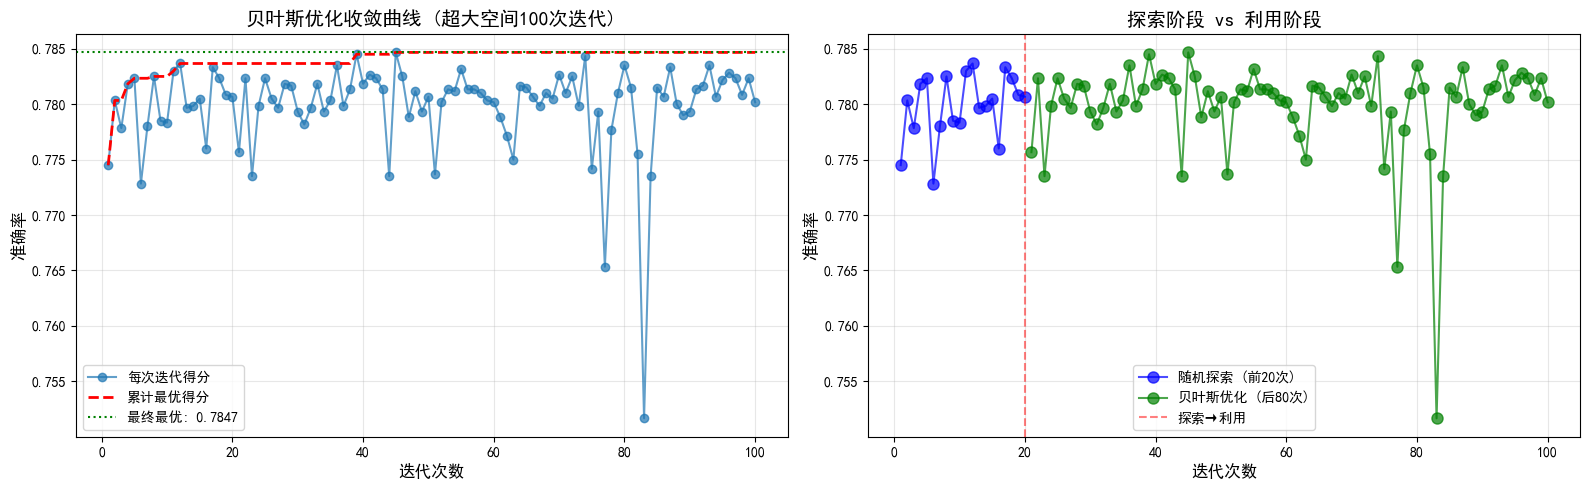

In [16]:
# 提取所有迭代的结果
iterations = []
scores = []
for i, res in enumerate(optimizer.res): # res包含每次迭代的结果，index从0开始
    iterations.append(i + 1) # 迭代次数从1开始
    scores.append(res['target']) # 提取得分

# 计算累计最优值
best_scores = []
current_best = -np.inf # 初始化为负无穷大
for score in scores: 
    if score > current_best: # 检查当前得分是否打破历史记录
        current_best = score
    best_scores.append(current_best)

# 绘制优化轨迹
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5)) # 创建1行2列的子图

# 左图：每次迭代的得分
ax1.plot(iterations, scores, 'o-', label='每次迭代得分', alpha=0.7, markersize=6)
ax1.plot(iterations, best_scores, 'r--', label='累计最优得分', linewidth=2)
ax1.axhline(y=optimizer.max['target'], color='green', linestyle=':', 
            label=f'最终最优: {optimizer.max["target"]:.4f}') # axhline绘制水平线
ax1.set_xlabel('迭代次数', fontsize=12)
ax1.set_ylabel('准确率', fontsize=12)
ax1.set_title('贝叶斯优化收敛曲线 (超大空间100次迭代)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 右图：初始探索 vs 贝叶斯优化
init_points = 20  # 更新为20
ax2.plot(iterations[:init_points], scores[:init_points], 'bo-', 
         label=f'随机探索 (前{init_points}次)', markersize=8, alpha=0.7)
ax2.plot(iterations[init_points:], scores[init_points:], 'go-', 
         label=f'贝叶斯优化 (后{len(iterations)-init_points}次)', markersize=8, alpha=0.7)
ax2.axvline(x=init_points, color='red', linestyle='--', alpha=0.5, label='探索→利用') # axvline绘制垂直线
ax2.set_xlabel('迭代次数', fontsize=12)
ax2.set_ylabel('准确率', fontsize=12)
ax2.set_title('探索阶段 vs 利用阶段', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
# 输出统计信息
print(f"  总迭代次数: {len(scores)}")
print(f"  最低得分: {min(scores):.4f}")
print(f"  最高得分: {max(scores):.4f}")
print(f"  平均得分: {np.mean(scores):.4f}")
print(f"  得分标准差: {np.std(scores):.4f}")
print(f"  得分提升: {max(scores) - scores[0]:.4f}")

  总迭代次数: 100
  最低得分: 0.7517
  最高得分: 0.7847
  平均得分: 0.7799
  得分标准差: 0.0041
  得分提升: 0.0102
